In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

## 請安裝
> pip install opencv-python

# Problem : K-Means Clustering
**K-Means Clustering** is an unsupervised learning algorithm for data grouping. In image segmen- tation, it can be applied to partition image pixels into different groups based on the associated pixel values or features. In this problem, you will learn how to segment the provided image by using K-means clustering.

In [5]:
img = cv2.imread('./Unit07/data/bird.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #OpenCV read as BGR, needs to convert to RGB

## 1-1. cluster with only RGB values

In [23]:
def km_clust(array, n_clusters):   
    # Define the k-means clustering problem
    k_m = KMeans(n_clusters = n_clusters)
    # Solve the k-means clustering problem
    k_m.fit(array)
    # Get the coordinates of the clusters centres
    center = k_m.cluster_centers_
    print(f'center: {center}')
    # Get the label of each point
    label = k_m.labels_
    return(label, center)

In [24]:
h, w, c = img.shape
print(img.shape)
Z= img.reshape((-1,3))
Z.shape

K = 2
label, center = km_clust(Z, K)

#Now convert back to unit8 and make original image
center = np.uint8(center[:, :3])
center
label


(1024, 1024, 3)
center: [[163.20084717 197.59853146 120.55090799]
 [107.1675546   95.08795049  71.2035591 ]]


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

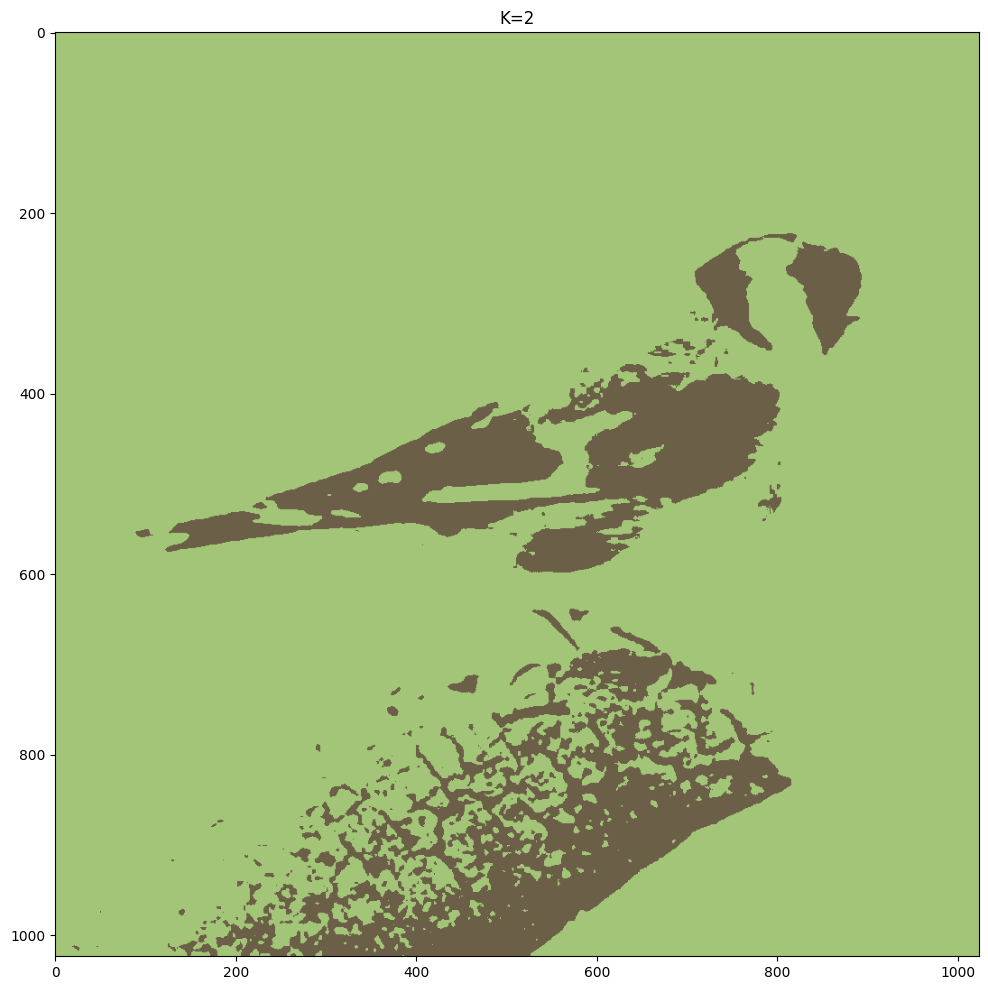

In [29]:
label.flatten()
res = center[label.flatten()]
res = res.reshape(img.shape)

plt.figure(figsize=(16, 12))
plt.title(f"K={K}")
plt.imshow(res)

## 1-2. cluster with RGB values and the location

center: [[154.42514629 186.49380946 117.00957325 510.73006446 256.00519304]
 [156.47375482 180.32204954 110.42277232 512.27296668 768.00065742]]
center: [[157.11693528 182.78436561 111.35859135 769.24944921 766.17342314]
 [151.91915831 194.07004576 111.30230916 254.03196804 256.58791496]
 [155.65716101 177.53723756 109.36504379 257.54332144 768.38216539]
 [157.09826974 179.27785035 122.88447729 766.30427027 254.00185249]]
center: [[157.68806364 180.09711525 114.9133704  178.64603377 847.12797735]
 [157.0716451  203.0970913  117.15045312 535.31383909 168.30885274]
 [152.23602649 179.09170113 108.45541753 880.74059583 776.14714102]
 [158.49479888 198.01521018 111.25745718 201.00106344 504.41436692]
 [152.33449617 194.72231057 111.83351789 175.03660841 168.36654206]
 [159.41981113 171.74417023 129.39251121 875.11724886 248.00790775]
 [143.12490603 145.60935949  98.27177868 588.42984514 527.75918659]
 [163.82970332 200.40500059 117.58712873 543.42495717 870.11127508]]
center: [[157.8876926

ValueError: num must be an integer with 1 <= num <= 5, not 6

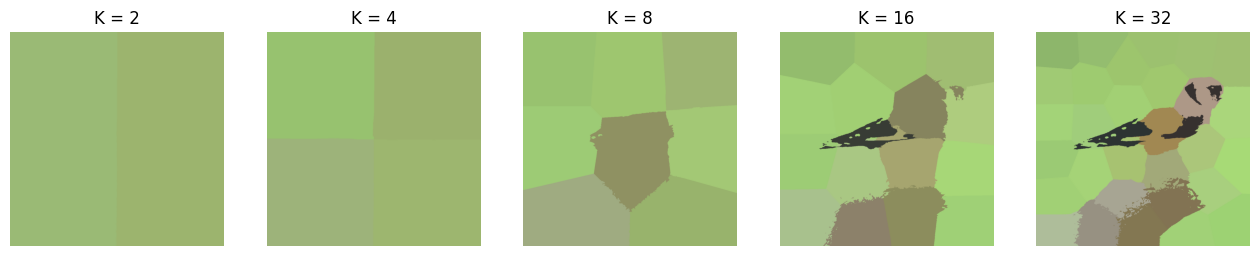

In [33]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h], [w]])
Z = Z.reshape(-1, 5)

Ks = [2,4,8,16,32,64]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

## 1-3. explain the differences between the two methods under the same K.
![](images/7.4_result.PNG)

In [34]:
h, w, c = img.shape
print(img.shape)

(1024, 1024, 3)


center: [[158.80155722 192.409605   113.09503551  61.69180711 127.22114699]
 [152.34658692 175.0976326  114.30286001 189.06073681 128.47948093]]
center: [[167.57582979 206.36792813 123.00719366 170.47253865 211.59001108]
 [166.13040436 200.21154313 129.35418828 165.60717024  50.99764837]
 [157.8749398  192.31909103 112.38076619  45.4865839  126.88472028]
 [114.2576901  102.22561808  76.22187485 173.9150466  137.38755031]]
center: [[166.58952334 198.45553836 122.1808884   56.35177567 220.42933162]
 [167.9897305  200.40735178 133.60814828 188.16722252  53.07015422]
 [ 47.12647248  48.03156679  45.95819325 116.68092519 136.69790838]
 [132.15809495 119.8373038   90.22983228 218.40134676 127.95538991]
 [156.22456957 200.99714777 114.56520283  67.7261126   41.56293375]
 [158.03217678 199.68329985 110.6897884   45.25174463 125.3745949 ]
 [162.72591456 145.15762562 105.88918317 124.14563695 156.6193516 ]
 [164.60953904 211.3591816  120.36180183 194.4752683  212.36217386]]
center: [[159.4350293

ValueError: num must be an integer with 1 <= num <= 5, not 6

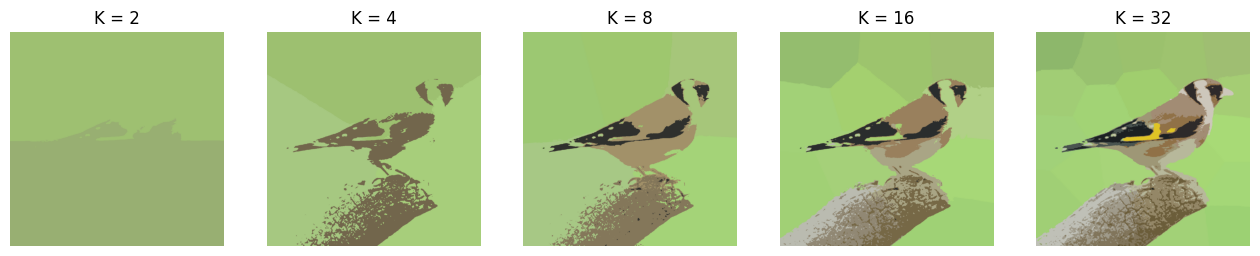

In [35]:
h, w, c = img.shape

# Added location feature
Z = np.zeros((h, w, c + 2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h/4], [w/4]])
Z = Z.reshape(-1, 5)

Ks = [2, 4, 8, 16, 32, 64]
plt.figure(figsize=(16, 12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i + 1)
    plt.axis("off")
    plt.title("K = {}".format(K))
    plt.imshow(res)

plt.show()
